# 3.6.5 - Predicting Cancer

   1. Sample code number            
   2. Clump Thickness               
   3. Uniformity of Cell Size       
   4. Uniformity of Cell Shape      
   5. Marginal Adhesion             
   6. Single Epithelial Cell Size   
   7. Bare Nuclei                   
   8. Bland Chromatin               
   9. Normal Nucleoli               
   10. Mitoses                       
   11. Class                        

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

f = r'..\..\..\..\Data Science Data\Unit 3\Cancer.csv'

col_names = ['id',
             'clump_thickness',
             'uniformity_cell_size',
             'uniformity_cell_shape',
             'adhesion',
             'single_cell_size',
             'bare_nuclei',
             'chromatin',
             'normal_nucleoli',
             'mitoses',
             'class']

df = pd.read_csv(f,sep=',',header=None,usecols=range(1,11,1),names=col_names,na_values='?')

In [58]:
df.dropna(inplace=True)
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])

replace_me = {'class':{4:'cancerous',2:'benign'}}
df.replace(to_replace=replace_me,inplace=True)

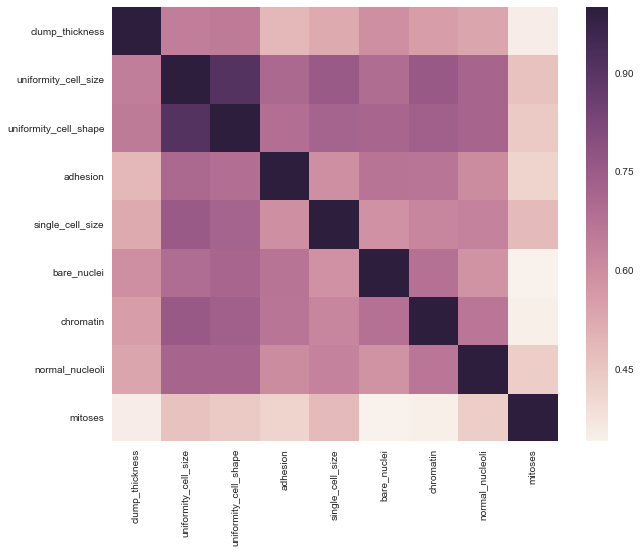

In [59]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.show()

C:\Users\awazi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


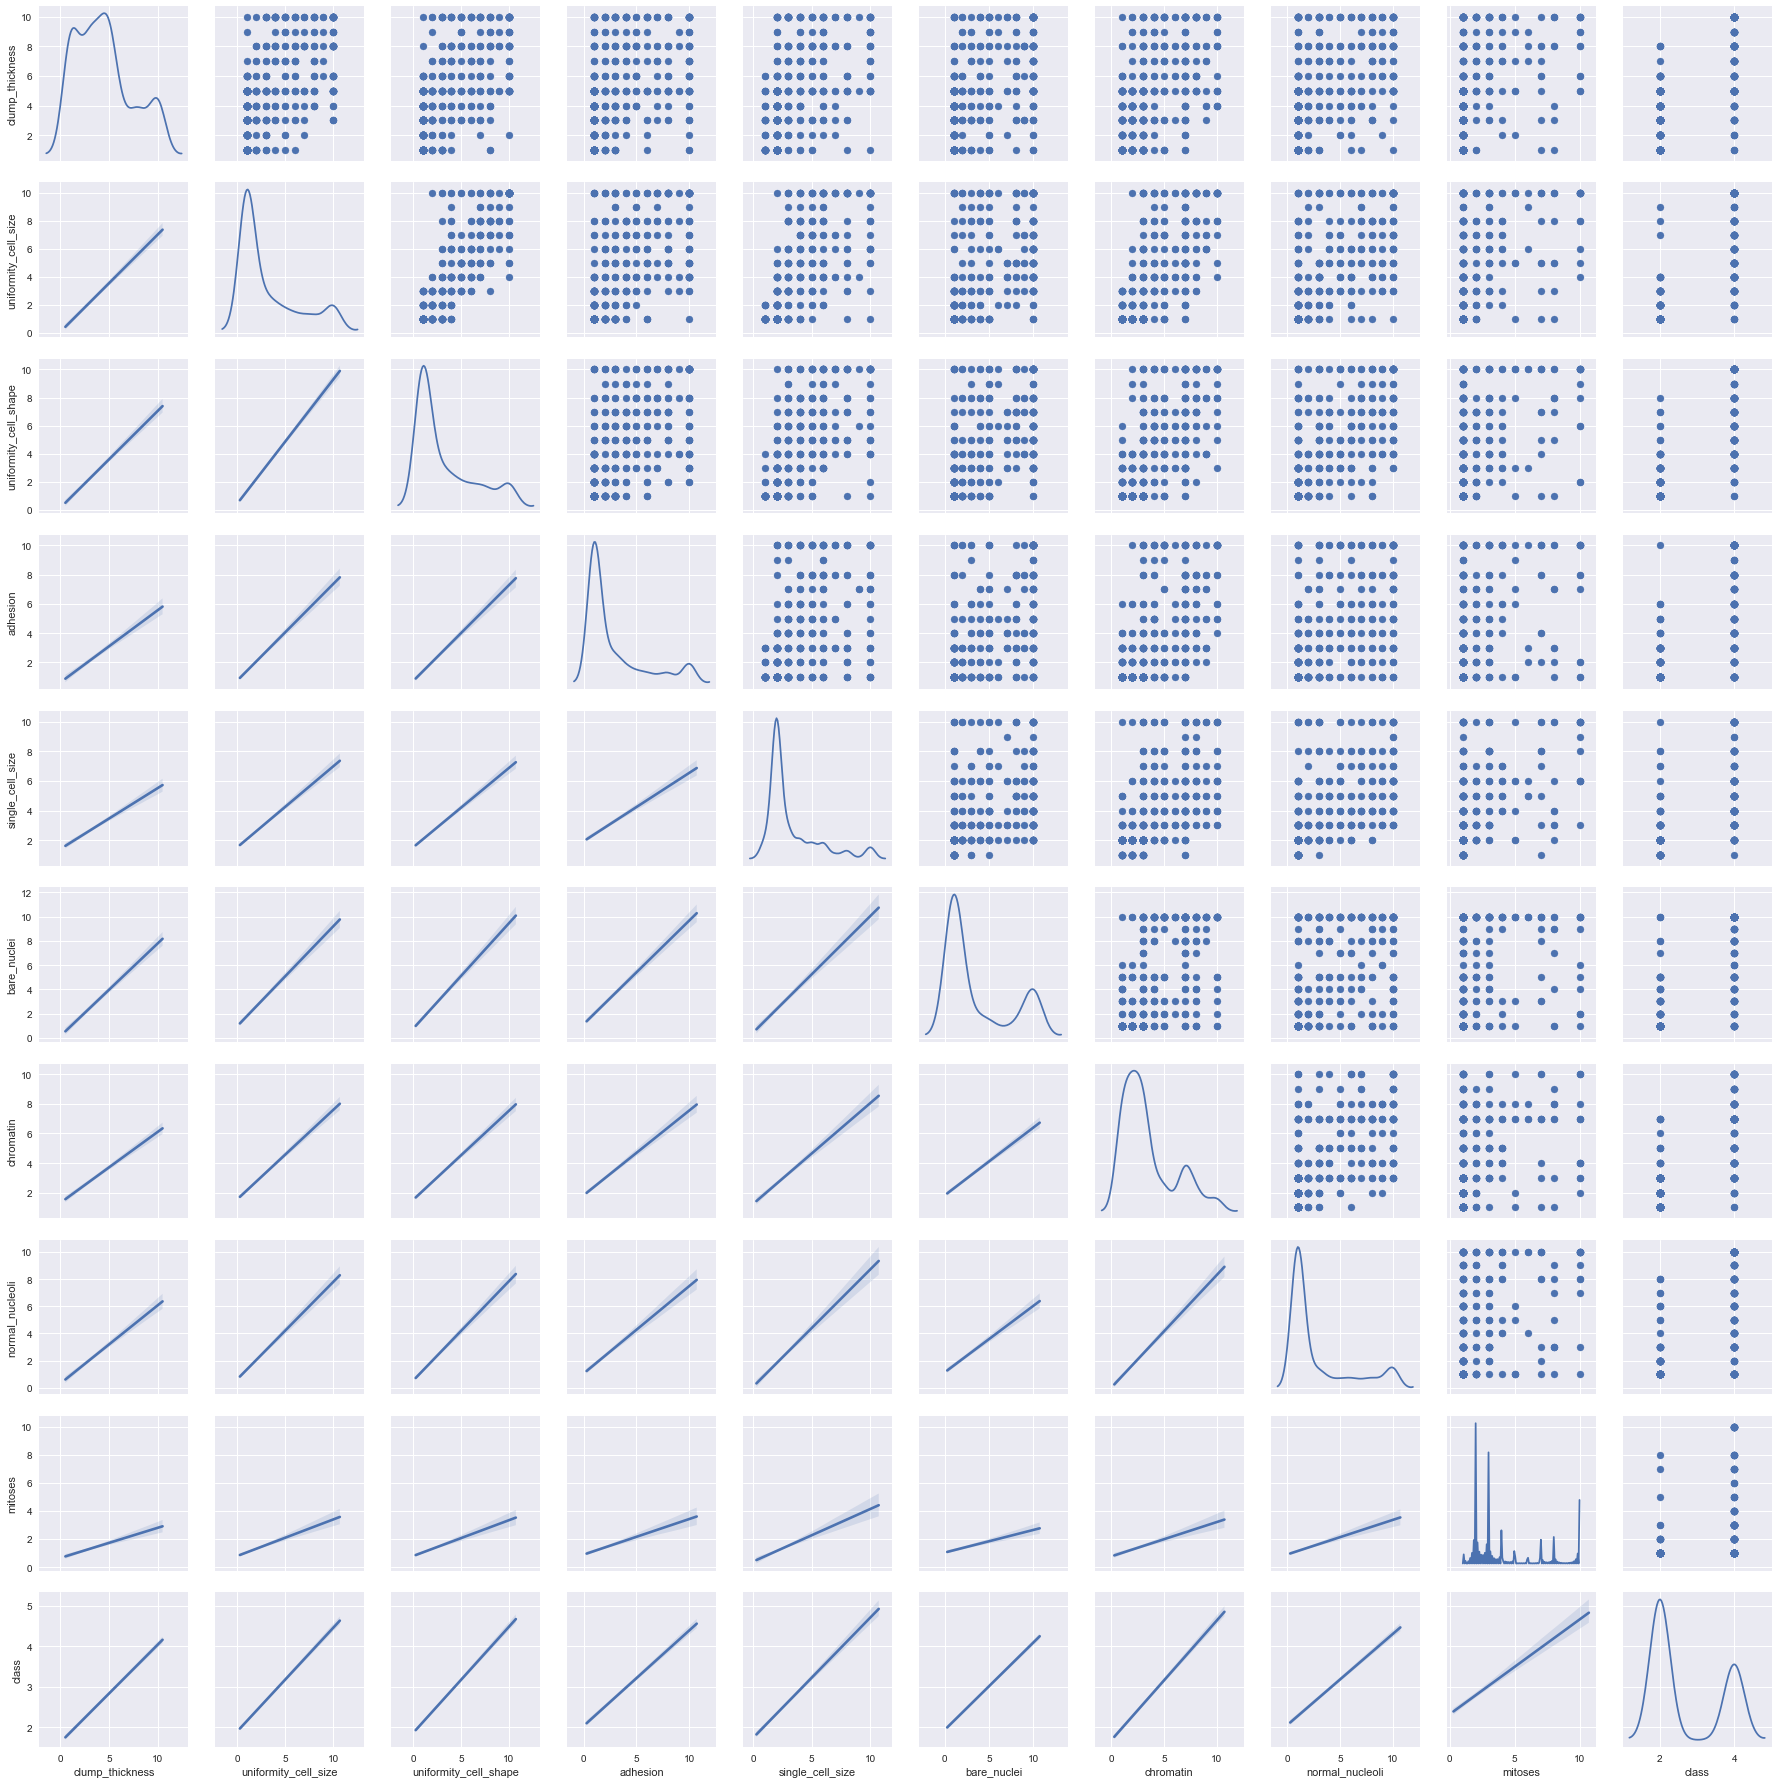

In [9]:
pg = sns.PairGrid(df, diag_sharey=False)
pg.map_upper(plt.scatter)
pg.map_lower(sns.regplot,scatter_kws=(dict(alpha=0)))
pg.map_diag(sns.kdeplot)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split

X = df.loc[:,df.columns != 'class']
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

knc = KNeighborsClassifier(n_neighbors=5)
cross_val_score(knc,X,y, cv=10).mean()

0.97233525467292703

In [62]:
from sklearn.metrics import confusion_matrix

knc.fit(X_train,y_train)
y_predict = knc.predict(X_test)

confusion_matrix(y_test, y_predict)

array([[90,  0],
       [ 5, 42]])

In [63]:
from sklearn.svm import SVC

svc = SVC(C=1)
cross_val_score(svc,X,y,cv=10).mean()

0.95777856243081272

In [64]:
svc.fit(X_train,y_train)
y_predict = svc.predict(X_test)

confusion_matrix(y_test,y_predict)

array([[88,  2],
       [ 1, 46]])

In [65]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(penalty='l2',C=1)
cross_val_score(logr,X,y,cv=10).mean()

0.96072037510656438

In [66]:
logr.fit(X_train,y_train)
y_predict = svc.predict(X_test)

confusion_matrix(y_test,y_predict)

array([[88,  2],
       [ 1, 46]])

In [67]:
# Normalize the dataset

df_ss = df[df['class'] == 'cancerous']
df_ss2 = df[df['class'] == 'benign'].sample(n=df_ss.shape[0])
df_ss = df_ss.append(df_ss2)

for value in df_ss['class'].unique():
    print('Number of {} cell type:'.format(value))
    print(df_ss[df_ss['class'] == value]['class'].count())

Number of cancerous cell type:
239
Number of benign cell type:
239


In [69]:
X = df_ss.loc[:,df_ss.columns != 'class']
y = df_ss['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [72]:
# Look at all the models on a balanced dataset

models = [knc,svc,logr]

for model in models:
    model.fit(X_train,y_train)
    y_predict = model.predict(X_test)
    print('Confusion Matrix for {} model:'.format(model))
    print(confusion_matrix(y_test,y_predict))
    print('-'*20)

Confusion Matrix for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform') model:
[[39  4]
 [ 1 52]]
--------------------
Confusion Matrix for SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) model:
[[38  5]
 [ 1 52]]
--------------------
Confusion Matrix for LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) model:
[[39  4]
 [ 1 52]]
--------------------
